In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'experiment-2a-withrule-combined.csv'
data = pd.read_csv(file_path)

# Load the second dataset
file_path_2 = 'experiment-2a-norule-combined.csv'
data_2 = pd.read_csv(file_path_2)

# Filter the rows which contain a value in the stimulus_name column
filtered_data = data.dropna(subset=['stimulus_name'])
filtered_data_2 = data_2.dropna(subset=(['stimulus_name']))

# Ensure 'response' is numeric, converting if necessary
filtered_data.loc[:, 'response'] = pd.to_numeric(filtered_data['response'], errors='coerce')
filtered_data_2.loc[:, 'response'] = pd.to_numeric(filtered_data_2['response'], errors='coerce')

# Group the responses by each stimulus_name
grouped_data = filtered_data.groupby('stimulus_name')['response'].apply(list).reset_index()
grouped_data_2 = filtered_data_2.groupby('stimulus_name')['response'].apply(list).reset_index()

# Remove groups with no responses
grouped_data = grouped_data[grouped_data['response'].apply(len) > 0]
grouped_data_2 = grouped_data_2[grouped_data_2['response'].apply(len) > 0]

# Calculate mean and standard deviation
grouped_data['mean'] = grouped_data['response'].apply(np.mean)
grouped_data['std_dev'] = grouped_data['response'].apply(np.std)

grouped_data_2['mean'] = grouped_data_2['response'].apply(np.mean)
grouped_data_2['std_dev'] = grouped_data_2['response'].apply(np.std)

# Merge the two datasets on stimulus_name
merged_data = pd.merge(grouped_data, grouped_data_2, on='stimulus_name', suffixes=('_rule', '_norule'))

# Calculate the difference in mean and standard deviation between the two datasets
merged_data['mean_difference'] = merged_data['mean_rule'] - merged_data['mean_norule']
merged_data['std_dev_difference'] = merged_data['std_dev_rule'] - merged_data['std_dev_norule']

# Save the merged data to a CSV file
output_file_path = 'comparison_data.csv'
merged_data.to_csv(output_file_path, index=False)

<module 'matplotlib.pyplot' from '/Users/joekwon/opt/anaconda3/envs/ppl_morality/lib/python3.10/site-packages/matplotlib/pyplot.py'>

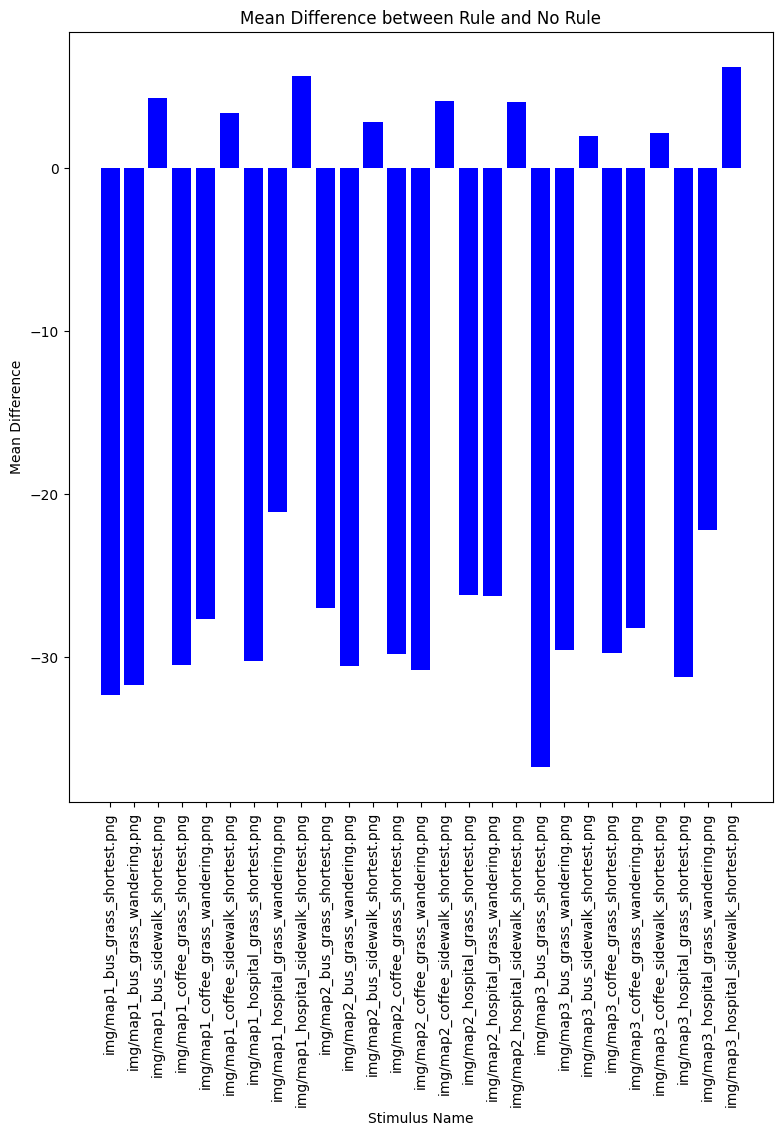

In [15]:
# Visualization
plt.figure(figsize=(20, 10))

# Plot mean differences
plt.subplot(1, 2, 1)
plt.bar(merged_data['stimulus_name'], merged_data['mean_difference'], color='blue')
plt.xlabel('Stimulus Name')
plt.ylabel('Mean Difference')
plt.title('Mean Difference between Rule and No Rule')
plt.xticks(rotation=90)
plt

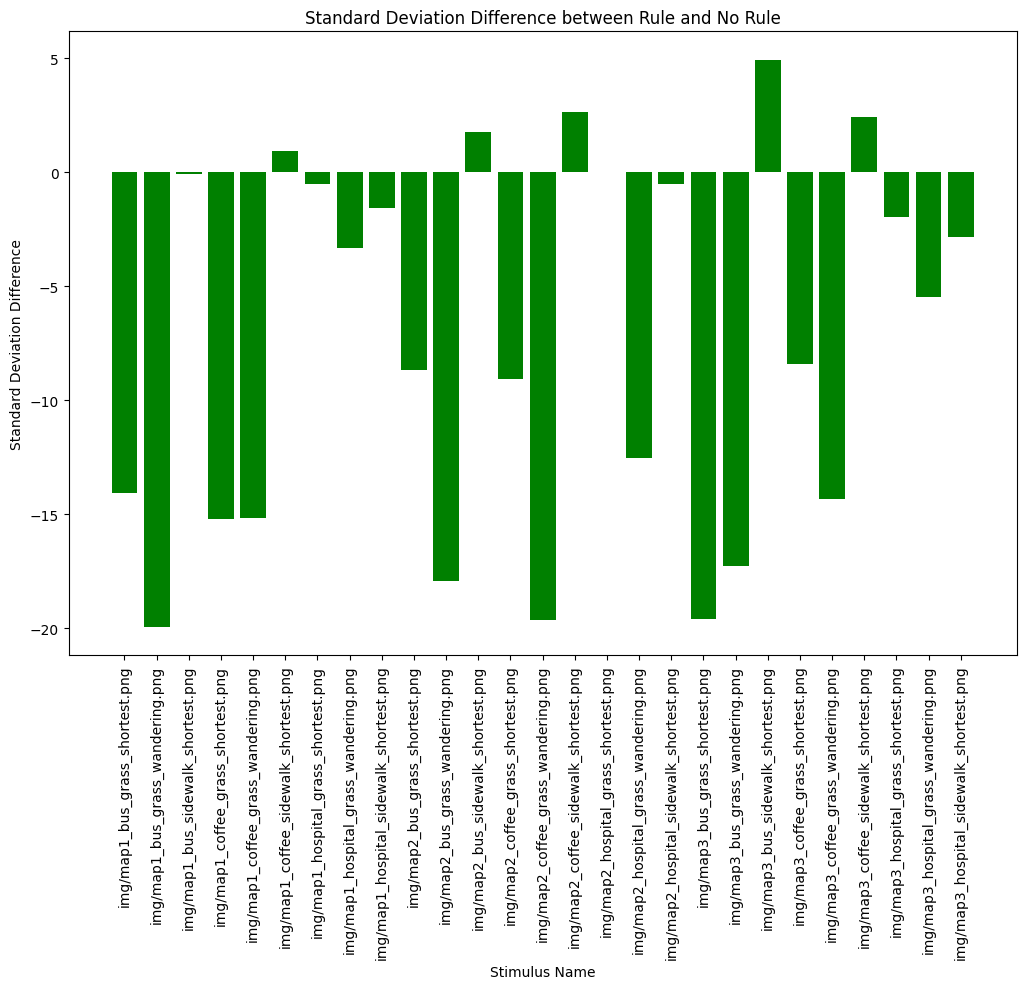

In [16]:
# Plot standard deviation differences
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 2)
plt.bar(merged_data['stimulus_name'], merged_data['std_dev_difference'], color='green')
plt.xlabel('Stimulus Name')
plt.ylabel('Standard Deviation Difference')
plt.title('Standard Deviation Difference between Rule and No Rule')
plt.xticks(rotation=90)

plt.tight_layout()

/var/folders/f2/c92ct4dj19d5n6759lnp5hb40000gn/T/ipykernel_44741/2720979578.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([responses for responses in grouped_data['response']], labels=grouped_data['stimulus_name'], vert=False)
/var/folders/f2/c92ct4dj19d5n6759lnp5hb40000gn/T/ipykernel_44741/2720979578.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([responses for responses in grouped_data_2['response']], labels=grouped_data_2['stimulus_name'], vert=False)


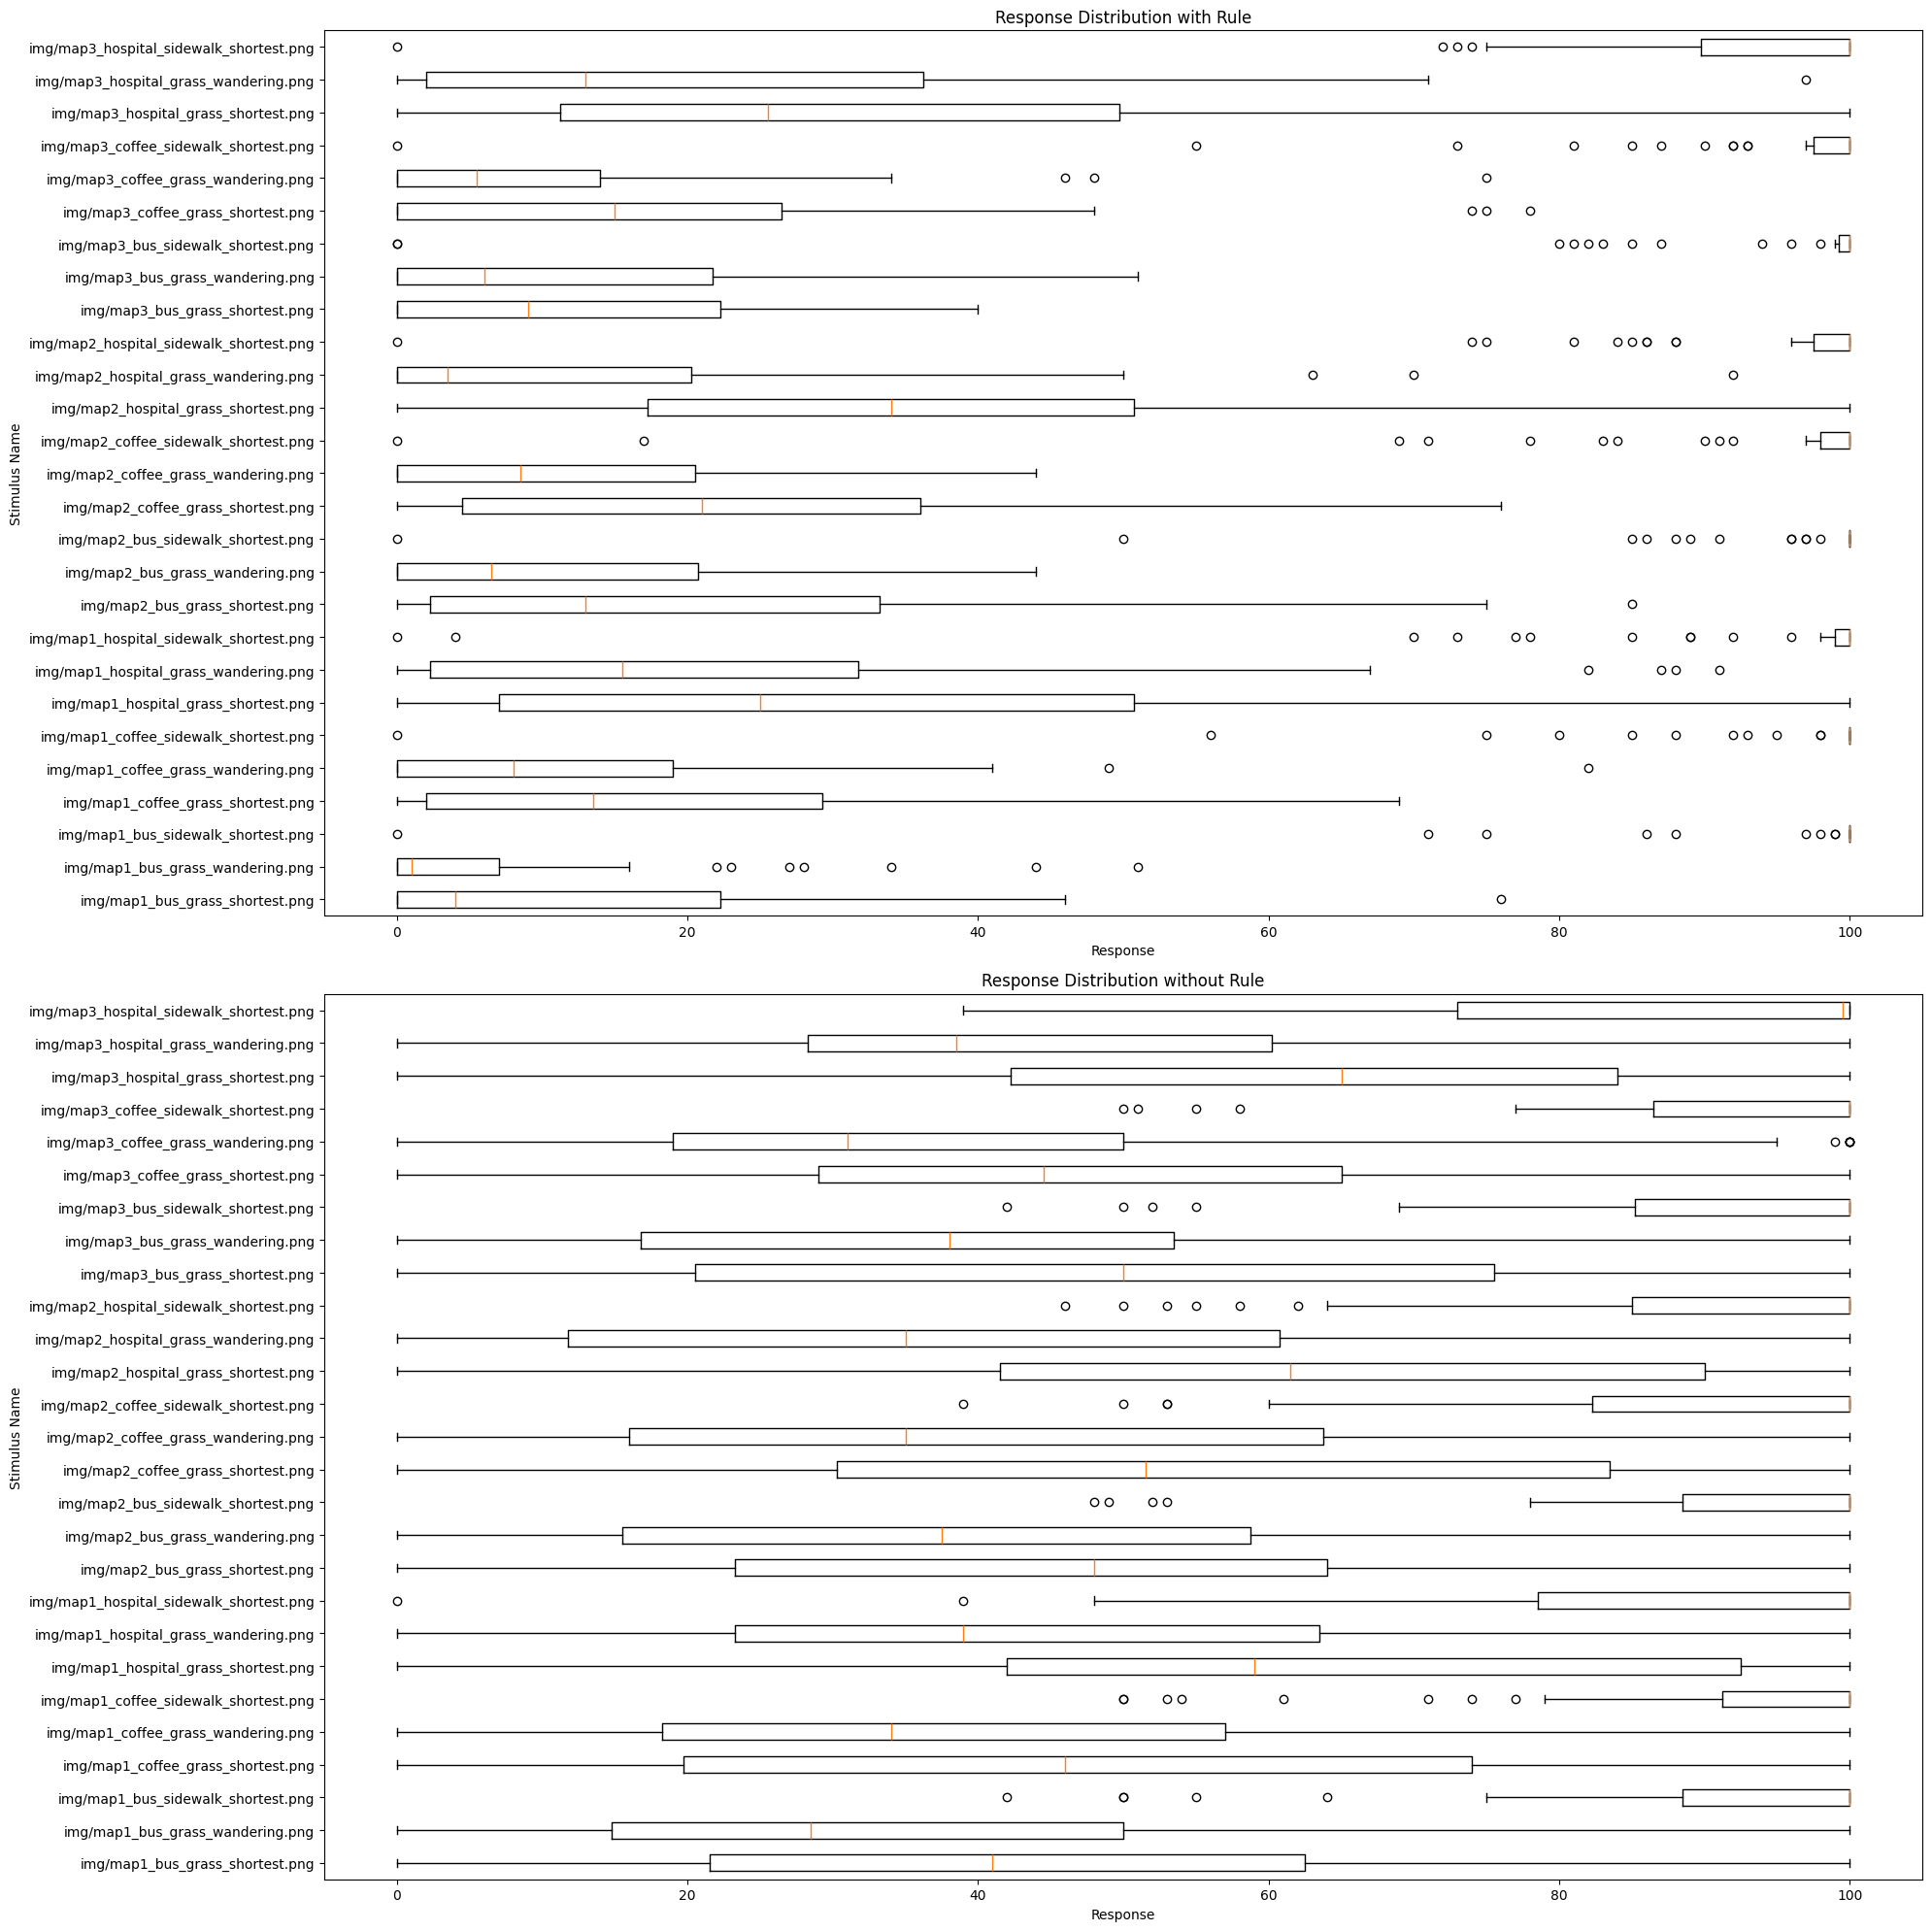

In [21]:

# Plotting
plt.figure(figsize=(20, 20))

plt.subplot(2, 1, 1)
plt.boxplot([responses for responses in grouped_data['response']], labels=grouped_data['stimulus_name'], vert=False)
plt.xlabel('Response')
plt.ylabel('Stimulus Name')
plt.title('Response Distribution with Rule')

plt.subplot(2, 1, 2)
plt.boxplot([responses for responses in grouped_data_2['response']], labels=grouped_data_2['stimulus_name'], vert=False)
plt.xlabel('Response')
plt.ylabel('Stimulus Name')
plt.title('Response Distribution without Rule')

plt.tight_layout()
plt.show()


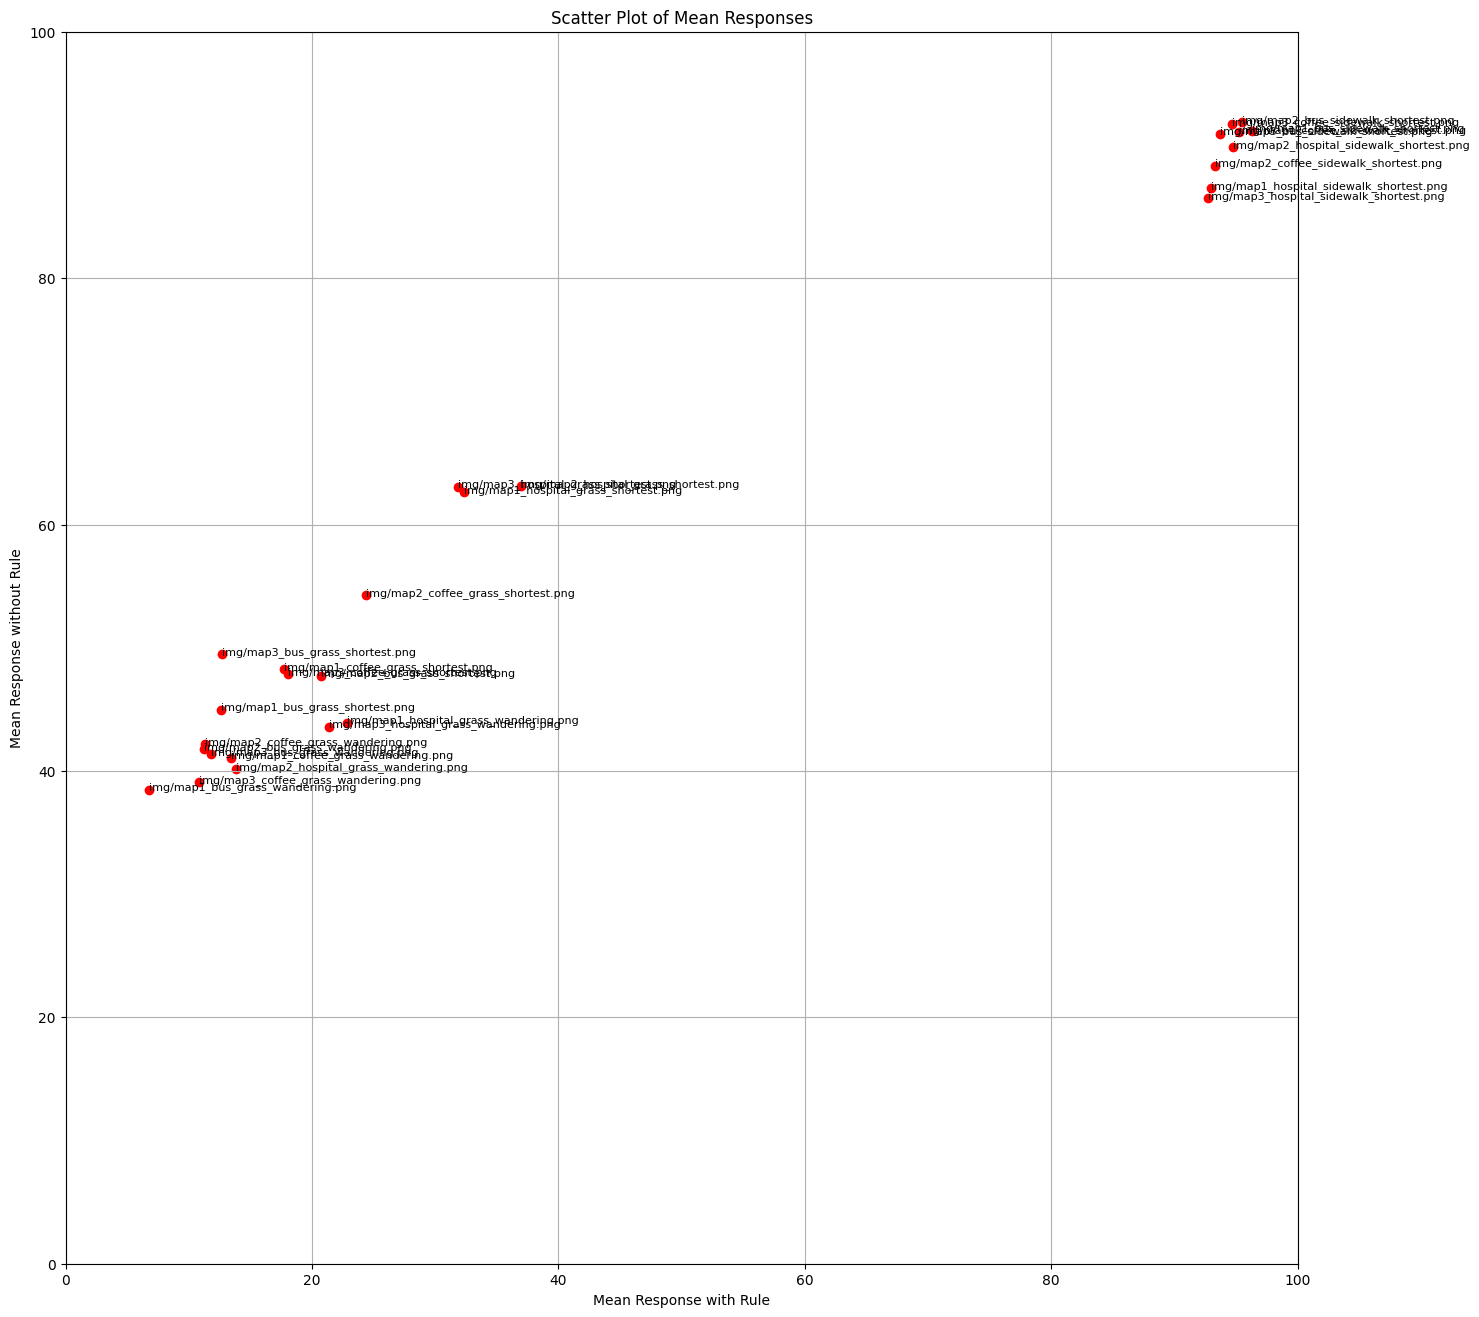

In [18]:
# Scatter plot for means
plt.figure(figsize=(20, 16))
plt.scatter(merged_data['mean_rule'], merged_data['mean_norule'], color='red')
plt.xlabel('Mean Response with Rule')
plt.ylabel('Mean Response without Rule')
plt.title('Scatter Plot of Mean Responses')
plt.grid(True)

# Add labels to the scatter plot
for i, row in merged_data.iterrows():
    plt.text(row['mean_rule'], row['mean_norule'], row['stimulus_name'], fontsize=8)

# Ensure the same scale for both axes, starting from 0 to 100
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()


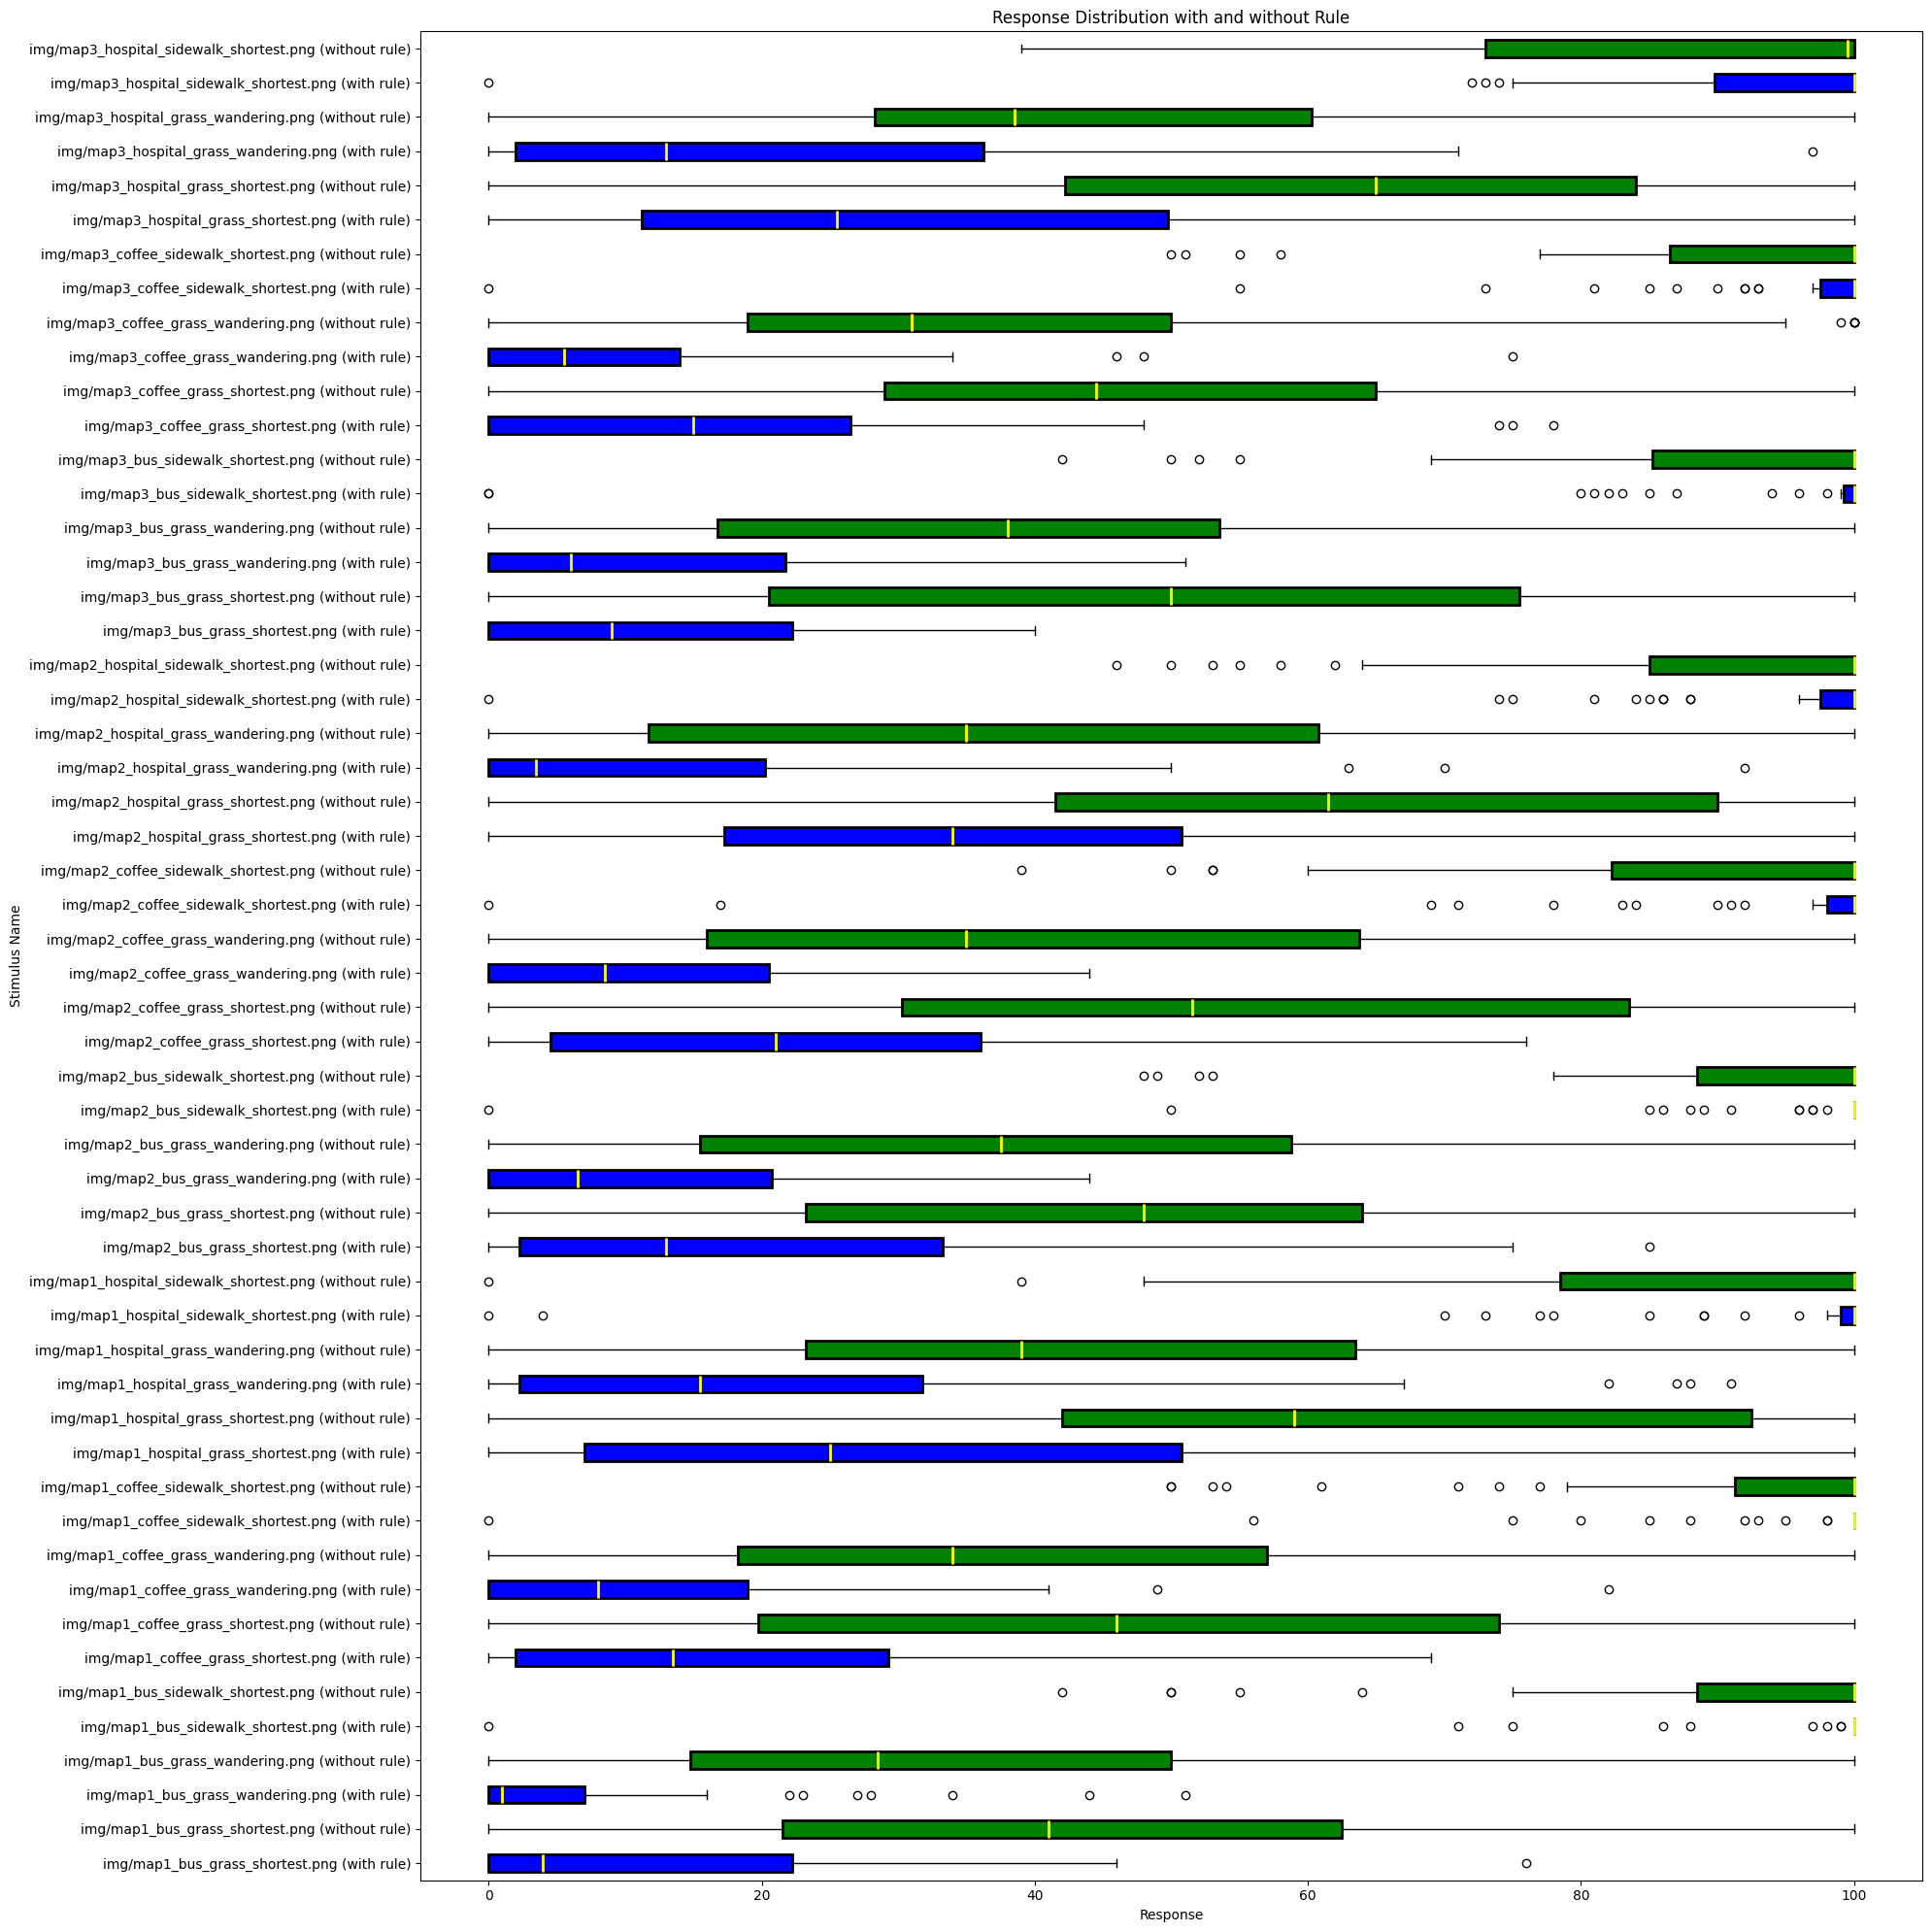

In [22]:
# Combine responses into a single dataframe with an additional column to indicate the condition
grouped_data['condition'] = 'with_rule'
grouped_data_2['condition'] = 'without_rule'

combined_data = pd.concat([grouped_data, grouped_data_2])

# Prepare data for plotting
plot_data = []
colors = []
labels = []

for stimulus in combined_data['stimulus_name'].unique():
    with_rule_responses = combined_data[(combined_data['stimulus_name'] == stimulus) & (combined_data['condition'] == 'with_rule')]['response'].values
    without_rule_responses = combined_data[(combined_data['stimulus_name'] == stimulus) & (combined_data['condition'] == 'without_rule')]['response'].values

    if len(with_rule_responses) > 0:
        plot_data.append(with_rule_responses[0])
        colors.append('blue')
        labels.append(stimulus + ' (with rule)')
    
    if len(without_rule_responses) > 0:
        plot_data.append(without_rule_responses[0])
        colors.append('green')
        labels.append(stimulus + ' (without rule)')

# Plot the data
plt.figure(figsize=(20, 20))

boxprops = dict(linestyle='-', linewidth=2)
medianprops = dict(linestyle='-', linewidth=2, color='yellow')

box_plot = plt.boxplot(plot_data, vert=False, patch_artist=True, boxprops=boxprops, medianprops=medianprops)

# Color the boxes
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Response')
plt.ylabel('Stimulus Name')
plt.title('Response Distribution with and without Rule')

# Set custom labels
plt.yticks(ticks=np.arange(1, len(labels) + 1), labels=labels)

plt.tight_layout()
plt.savefig('overlayed_response_distributions.png')
plt.show()